In [1]:
#importing all the required libraries that we will be using for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # The default processing plot platform for python
import seaborn as sn  # A fancier way to plot things with nice animations and color patterns
import random
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier #KNeighborsRegressor
from sklearn.svm import SVC #SupportVectorClassifier (SVC) for Regression the equivalent will be SVR (Support Vector Regression)
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier#RandomForestClassifier, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score



##### LOADING THE DATASET

In [2]:
#i have stored mydataset as heart.csv and i am assigning it to the variable named "Data".
Data= pd.read_csv("heart.csv")
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### EXPLORATORY DATA ANALYSIS
Here I wanted to gain important statistical insights from the data and I checked for the distributions of the different attributes, correlations of the attributes with each other and the target variable.
The aim of this project is to solve the following questions:
1.	Identify the risk factors that contribute to the heart diseases.
2.	Identify the frequency of disease based on the gender and age.
3.	Identify the survival rate based on the gender and age

STEPS INVOLVED:
a. Visualizing the number of patients having a heart disease and not having a heart disease.
b. Visualizing the age and weather patient has disease or not
c. Visualizing correlation between all features using a heat map

In [3]:
"""It is always a good option to know more and more ablout your data that you have to work on as it makes things easier
and therefore i will be collecting as much as details possible so that it helps me in working on the data"""
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\Sakshi Shukla Vyas\anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


'The historams below give an idea of how each of the features and labels are distributed along the different ranges\nThe discrete bars represent a categorical variable and our target variable has two classes that is 0 which represents no \ndisease and 1 that means the disease is present.\n'

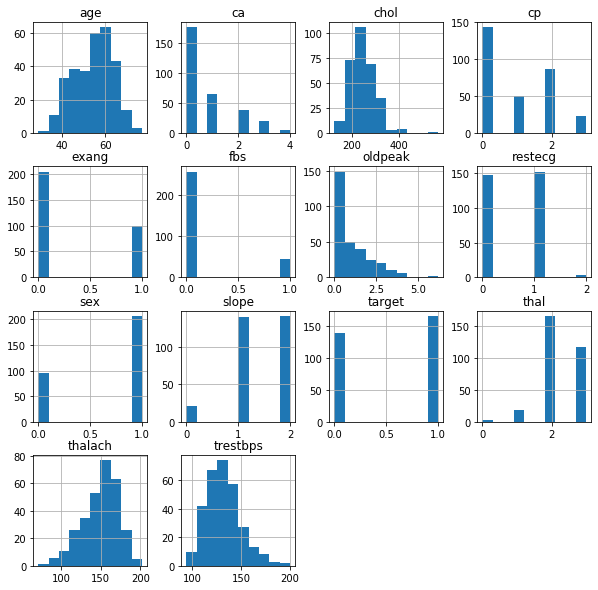

In [4]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
Data.hist(ax = ax)

"""The historams below give an idea of how each of the features and labels are distributed along the different ranges
The discrete bars represent a categorical variable and our target variable has two classes that is 0 which represents no 
disease and 1 that means the disease is present.
"""

In [5]:
#collecting the info is important to check for any null values in the data.
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    165
0    138
Name: target, dtype: int64


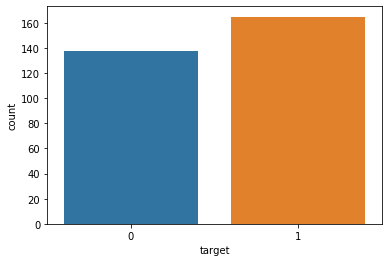

In [6]:
#I wanted to visualise the number of positive and negative cases of heart diseases in the dataset. 
"""
I will be visualising all the predictors for a better understanding of their presence in the dataset
"""

Y = Data["target"]

sn.countplot(Y)

data_target = Data.target.value_counts()

print(data_target)

#The bar plots suggest that both the predictors are in a balanced proportion

In [7]:
#let's print out the percentage of the patients who have the heart disease and who do not to be more clear
print("Count of patients with no heart disease: "+str(Y.where(Y==1).count()*100/303))
print("Count of patients with heart disease : "+str(Y.where(Y==0).count()*100/303))

Count of patients with no heart disease: 54.45544554455446
Count of patients with heart disease : 45.54455445544554


'\nThe matrix shows us that there are mixed results with some variables related negatively and some positively but\n none of the variables are highly correlated with the "Target"\n'

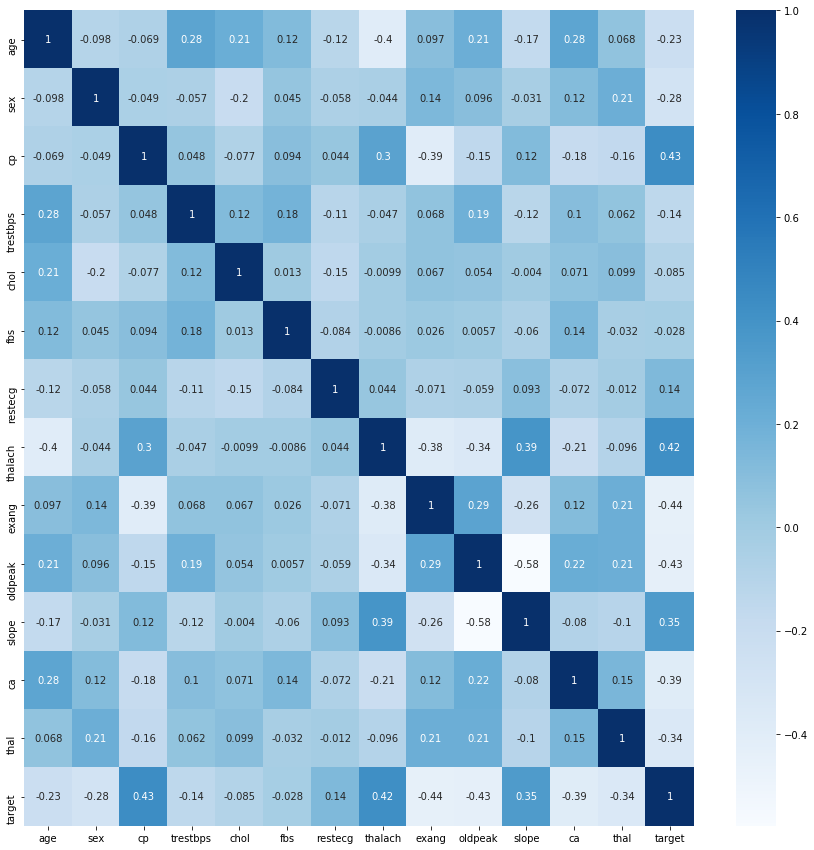

In [8]:
"""
Now to be more clear about the correlation between all the variables i will plot a correlation matrix which will
give me an idea of the relationship between the variables
"""

corr = Data.corr()

plt.figure(figsize=(15,15))
sn.heatmap(corr, annot=True, cmap="Blues")
"""
The matrix shows us that there are mixed results with some variables related negatively and some positively but
 none of the variables are highly correlated with the "Target"
"""



In [9]:
Data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
Data["target"].unique()

array([1, 0], dtype=int64)

In [11]:
"""
I will analyse and visualise all the predictors in the dataset that i think might be one of the factors that
are responsible for causing the heart disease in a person.
"""

'\nI will analyse and visualise all the predictors in the dataset that i think might be one of the factors that\nare responsible for causing the heart disease in a person.\n'

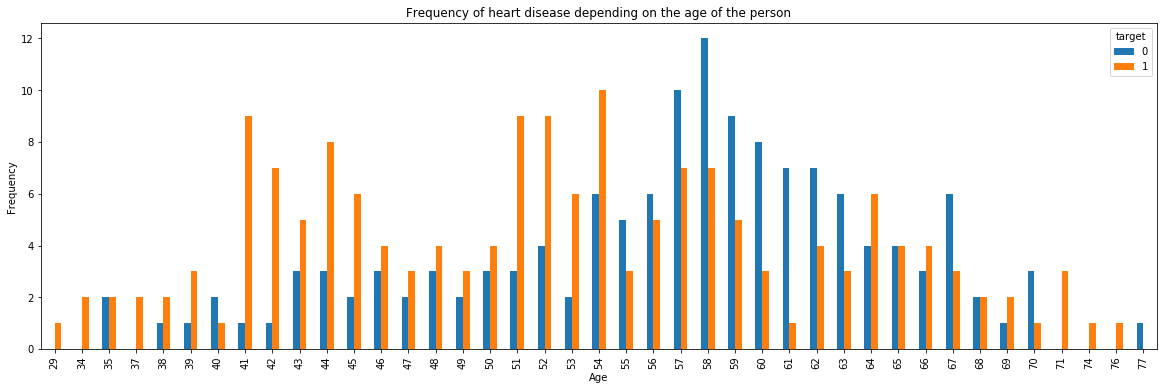

'\nAs seen below the plot clearly shows that with increasing age the frequency of getting a heart disease increases \nSo this data gives the answers for my 1st and 2nd question. Thus age is one of the risk factors that contribute to heart\ndiseases and also the frequency of getting a heart disease increases with increasing age.\n'

In [12]:
"""I will analyse the "age" feature as I want to identify if the gender is a crucial factor in determining
if the person will suffer from the heart disease or not"""
pd.crosstab(Data.age,Data.target).plot(kind="bar",figsize=(20,6))
plt.title('Frequency of heart disease depending on the age of the person')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
"""
As seen below the plot clearly shows that with increasing age the frequency of getting a heart disease increases 
So this data gives the answers for my 1st and 2nd question. Thus age is one of the risk factors that contribute to heart
diseases and also the frequency of getting a heart disease increases with increasing age.
"""

In [13]:
print(f"Mean age of the patient's that suffer from Heart disease : {Data.age.mean()}")

Mean age of the patient's that suffer from Heart disease : 54.366336633663366


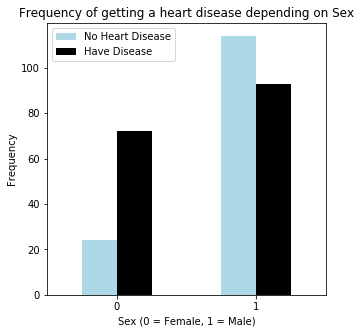

'\nAs seen in the plot clearly shows that females are more susceptible to get a heart disease than males.\nThus this proves that frequency of getting a heart disease is more in females than males and that answers my 2nd and 3rd question.\n'

In [14]:
"""I will analyse the sex feature as I want to identify if the gender is a crucial factor in determining
if the person will suffer fro the heart disease or not"""


pd.crosstab(Data.sex,Data.target).plot(kind="bar",figsize=(5,5),color=['lightblue','black' ])
plt.title('Frequency of getting a heart disease depending on Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

"""
As seen in the plot clearly shows that females are more susceptible to get a heart disease than males.
Thus this proves that frequency of getting a heart disease is more in females than males and that answers my 2nd and 3rd question.
"""

Text(26.426458333333343, 0.5, 'ST depression')

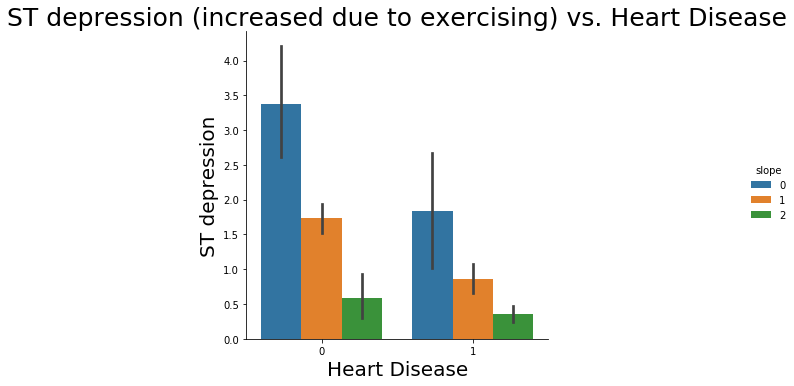

In [15]:
sn.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=Data);

plt.title('ST depression (increased due to exercising) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

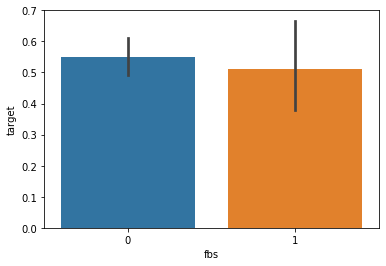

In [16]:
Data["fbs"].describe()
Data["fbs"].unique()
sn.barplot(Data["fbs"],Y)

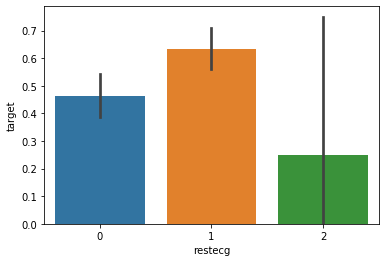

In [17]:
Data["restecg"].unique()
sn.barplot(Data["restecg"],Y)

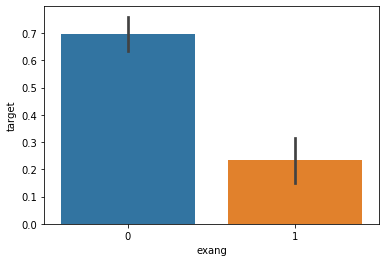

In [18]:
Data["exang"].unique()
sn.barplot(Data["exang"],Y)

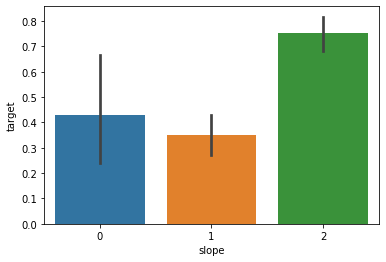

In [19]:
Data["slope"].unique()
sn.barplot(Data["slope"],Y)

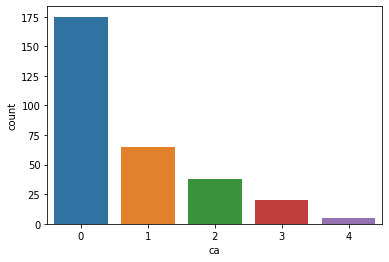

In [20]:
Data["ca"].unique()
sn.countplot(Data["ca"])

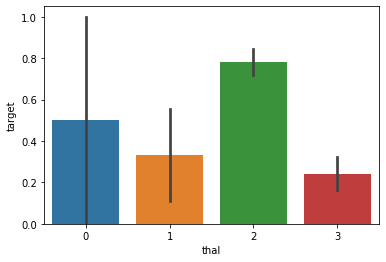

In [21]:
Data["thal"].unique()
sn.barplot(Data["thal"],Y)

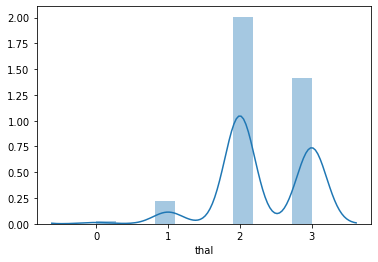

In [22]:
sn.distplot(Data["thal"])

##### DATA PRE-PROCESSING
Here I checked and dealt with missing and duplicate variables from the data set as these can affect the performance of different machine learning algorithms.

In [23]:
"""
Its always better to convert the categorical data into dummy variables and its needed to scale them before training the model
to increase the efficiency of the model
"""
Data = pd.get_dummies(Data, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'])
new_values = StandardScaler()
scaled_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Data[scaled_columns] = new_values.fit_transform(Data[scaled_columns])

In [24]:
X = Data.drop(columns=['target'])
X_names = X.columns.values

Y = Data['target']
y=Y.values

# Split the data into three parts (Core Model Training: 60%, Hyper-parameter Tuning: 20%, Testing: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state = 42)

X_test, X_tune, y_test, y_tune = train_test_split(X_test, y_test, test_size=.5, random_state = 42)

# Normalize based on Training Data

mu_tr = X_train.mean()
std_tr = X_train.std()+10**-5   # The 10^-5 is added to avoid numerical inconsistincies

X_train = (X_train - mu_tr)/std_tr
X_train['intercept'] = 1
X_test = (X_test - mu_tr)/std_tr
X_test['intercept'] = 1
X_tune = (X_tune - mu_tr)/std_tr
X_tune['intercept'] = 1

##### I WILL BE USING THE FOLLOWING ALGORITHMS TO GENERATE MY MODEL AND I WILL ALSO TUNE THE HYPERPARAMETERS FOR SOME OF THE ALGORITHMS:
1.  Logistic Regression
2.	KNN algorithm
3.	Naïve Bayes algorithm
4.	Decision Trees
5.	SVM
6.	Random Forest


In [25]:

# Analysis for KNN and its hyper-parameter (number of nearest neigbors to consider)
classifiers = [
KNeighborsClassifier(1),
KNeighborsClassifier(2),
KNeighborsClassifier(3),
KNeighborsClassifier(4),
KNeighborsClassifier(5),
KNeighborsClassifier(6),
KNeighborsClassifier(7),
KNeighborsClassifier(8),
KNeighborsClassifier(9),
KNeighborsClassifier(10),
KNeighborsClassifier(11),
KNeighborsClassifier(12),
KNeighborsClassifier(13),
KNeighborsClassifier(14),
KNeighborsClassifier(15)]


names = ["KNN_1", "KNN_2", "KNN_3", "KNN_4", "KNN_5", "KNN_6" ,"KNN_7",
        "KNN_8","KNN_9","KNN_10","KNN_11","KNN_12","KNN_13","KNN_14","KNN_15"]

Y_pred = pd.DataFrame() # Declare a panda
Y_pred['Class_true'] = y_tune

Y_results_tune = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    if name is "Hybrid":
        Z = np.round(np.median(Y_pred,axis=1),0).astype(int)
        Y_pred[name] = Z
    else:
    
        clf.fit(X_train, y_train)

        # Testing performance
        score = clf.score(X_tune, y_tune)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_tune)
            #Y_pred[prob_name] = Z
            Z = clf.predict(X_tune)
            Y_pred[name] = Z
        elif 'LR' in name:
            Z = clf.predict_proba(X_tune)
            Z = Z[:,1]                                                # Label for class 1
            Y_pred[name] = 1*(Z>threshold)
        else:
            Z = clf.predict_proba(X_tune)
            Z = Z[:,1]                                                # Label for class 1
            Y_pred[name] = clf.predict(X_tune)
        
    TP_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 1))
    FP_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 1))
    TN_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 0))
    FN_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_tune = Y_results_tune.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)

        
    print('Tuning: Finished running analysis for', name)

Y_results_tune

Tuning: Finished running analysis for KNN_1
Tuning: Finished running analysis for KNN_2
Tuning: Finished running analysis for KNN_3
Tuning: Finished running analysis for KNN_4
Tuning: Finished running analysis for KNN_5
Tuning: Finished running analysis for KNN_6
Tuning: Finished running analysis for KNN_7
Tuning: Finished running analysis for KNN_8
Tuning: Finished running analysis for KNN_9
Tuning: Finished running analysis for KNN_10
Tuning: Finished running analysis for KNN_11
Tuning: Finished running analysis for KNN_12
Tuning: Finished running analysis for KNN_13
Tuning: Finished running analysis for KNN_14
Tuning: Finished running analysis for KNN_15


,Classifier,TP,FP,TN,FN,Precision,Recall,F1_score,Accuracy,Specificity,Sensitivity
0,KNN_1,29,9,17,10,0.763158,0.743590,0.753247,0.707692,0.653846,0.743590
1,KNN_2,19,7,19,20,0.730769,0.487179,0.584615,0.584615,0.730769,0.487179
2,KNN_3,31,7,19,8,0.815789,0.794872,0.805195,0.769231,0.730769,0.794872
3,KNN_4,27,6,20,12,0.818182,0.692308,0.750000,0.723077,0.769231,0.692308
4,KNN_5,31,6,20,8,0.837838,0.794872,0.815789,0.784615,0.769231,0.794872
5,KNN_6,31,6,20,8,0.837838,0.794872,0.815789,0.784615,0.769231,0.794872
6,KNN_7,33,6,20,6,0.846154,0.846154,0.846154,0.815385,0.769231,0.846154
7,KNN_8,32,6,20,7,0.842105,0.820513,0.831169,0.800000,0.769231,0.820513
8,KNN_9,32,6,20,7,0.842105,0.820513,0.831169,0.800000,0.769231,0.820513
9,KNN_10,31,6,20,8,0.837838,0.794872,0.815789,0.784615,0.769231,0.794872


In [26]:


# Analysis for SVM and its hyper-parameter "C"
classifiers = [SVC(kernel="linear", C=0.001),
               SVC(kernel="linear", C=0.005),
               SVC(kernel="linear", C=0.01),
               SVC(kernel="linear", C=0.02),
               SVC(kernel="linear", C=0.03),
               SVC(kernel="linear", C=0.04),
               SVC(kernel="linear", C=0.05),
               SVC(kernel="linear", C=0.06),
               SVC(kernel="linear", C=0.07),
               SVC(kernel="linear", C=0.1),
               SVC(kernel="linear", C=0.2),
               SVC(kernel="linear", C=0.3),
               SVC(kernel="linear", C=0.4),
               SVC(kernel="linear", C=0.5),
               SVC(kernel="linear", C=1),
               SVC(kernel="linear", C=10)]


names = ["SVM_Linear_C_.001","SVM_Linear_C_.005","SVM_Linear_C_.01","SVM_Linear_C_.02", "SVM_Linear_C_.03", "SVM_Linear_C_.04", "SVM_Linear_C_.05", "SVM_Linear_C_.06" ,"SVM_Linear_C_.07",
        "SVM_Linear_C_.10","SVM_Linear_C_.2","SVM_Linear_C_.3","SVM_Linear_C_.4","SVM_Linear_C_.5","SVM_Linear_C_1","SVM_Linear_C_10"]

Y_pred = pd.DataFrame() # Declare a panda
Y_pred['Class_true'] = y_tune

Y_results_tune = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    if name is "Hybrid":
        Z = np.round(np.median(Y_pred,axis=1),0).astype(int)
        Y_pred[name] = Z
    else:
    
        clf.fit(X_train, y_train)

        # Testing performance
        score = clf.score(X_tune, y_tune)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_tune)
            #Y_pred[prob_name] = Z
            Z = clf.predict(X_tune)
            Y_pred[name] = Z
        elif 'LR' in name:
            Z = clf.predict_proba(X_tune)
            Z = Z[:,1]                                                # Label for class 1
            Y_pred[name] = 1*(Z>threshold)
        else:
            Z = clf.predict_proba(X_tune)
            Z = Z[:,1]                                                # Label for class 1
            Y_pred[name] = clf.predict(X_tune)
        
    TP_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 1))
    FP_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 1))
    TN_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 0))
    FN_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_tune = Y_results_tune.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)

        
    print('Tuning: Finished running analysis for', name)

Y_results_tune

Tuning: Finished running analysis for SVM_Linear_C_.001
Tuning: Finished running analysis for SVM_Linear_C_.005
Tuning: Finished running analysis for SVM_Linear_C_.01
Tuning: Finished running analysis for SVM_Linear_C_.02
Tuning: Finished running analysis for SVM_Linear_C_.03
Tuning: Finished running analysis for SVM_Linear_C_.04
Tuning: Finished running analysis for SVM_Linear_C_.05
Tuning: Finished running analysis for SVM_Linear_C_.06
Tuning: Finished running analysis for SVM_Linear_C_.07
Tuning: Finished running analysis for SVM_Linear_C_.10
Tuning: Finished running analysis for SVM_Linear_C_.2
Tuning: Finished running analysis for SVM_Linear_C_.3
Tuning: Finished running analysis for SVM_Linear_C_.4
Tuning: Finished running analysis for SVM_Linear_C_.5
Tuning: Finished running analysis for SVM_Linear_C_1
Tuning: Finished running analysis for SVM_Linear_C_10


,Classifier,TP,FP,TN,FN,Precision,Recall,F1_score,Accuracy,Specificity,Sensitivity
0,SVM_Linear_C_.001,34,9,17,5,0.790698,0.871795,0.829268,0.784615,0.653846,0.871795
1,SVM_Linear_C_.005,33,6,20,6,0.846154,0.846154,0.846154,0.815385,0.769231,0.846154
2,SVM_Linear_C_.01,33,6,20,6,0.846154,0.846154,0.846154,0.815385,0.769231,0.846154
3,SVM_Linear_C_.02,32,7,19,7,0.820513,0.820513,0.820513,0.784615,0.730769,0.820513
4,SVM_Linear_C_.03,33,7,19,6,0.825000,0.846154,0.835443,0.800000,0.730769,0.846154
5,SVM_Linear_C_.04,32,7,19,7,0.820513,0.820513,0.820513,0.784615,0.730769,0.820513
6,SVM_Linear_C_.05,32,7,19,7,0.820513,0.820513,0.820513,0.784615,0.730769,0.820513
7,SVM_Linear_C_.06,32,7,19,7,0.820513,0.820513,0.820513,0.784615,0.730769,0.820513
8,SVM_Linear_C_.07,33,7,19,6,0.825000,0.846154,0.835443,0.800000,0.730769,0.846154
9,SVM_Linear_C_.10,34,7,19,5,0.829268,0.871795,0.850000,0.815385,0.730769,0.871795


In [27]:
Y_pred

,Class_true,SVM_Linear_C_.001,SVM_Linear_C_.005,SVM_Linear_C_.01,SVM_Linear_C_.02,SVM_Linear_C_.03,SVM_Linear_C_.04,SVM_Linear_C_.05,SVM_Linear_C_.06,SVM_Linear_C_.07,SVM_Linear_C_.10,SVM_Linear_C_.2,SVM_Linear_C_.3,SVM_Linear_C_.4,SVM_Linear_C_.5,SVM_Linear_C_1,SVM_Linear_C_10
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1
57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
59,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
# Decision trees
# Not suitable for categorical variables (automatically biased to factors with more levels)
# Not stable
# Not the most accurate (there are better options in the family of decision trees)

names = ["Decision Tree"]

classifiers = [DecisionTreeClassifier(max_depth=3),
              DecisionTreeClassifier(max_depth=6),
              DecisionTreeClassifier(max_depth=9),
              DecisionTreeClassifier(max_depth=12),
            DecisionTreeClassifier(max_depth=15),
              DecisionTreeClassifier(max_depth=18),
              DecisionTreeClassifier(max_depth=21),
              DecisionTreeClassifier(max_depth=24),
              DecisionTreeClassifier(max_depth=27),
              DecisionTreeClassifier(max_depth=30)]

names=["Decision_Tree_Classifier_3","Decision_Tree_Classifier_6","Decision_Tree_Classifier_9","Decision_Tree_Classifier_12","Decision_Tree_Classifier_15","Decision_Tree_Classifier_18","Decision_Tree_Classifier_21","Decision_Tree_Classifier_24","Decision_Tree_Classifier_27","Decision_Tree_Classifier_30"]

y=Y.values

# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

threshold = np.sum(1*(y_train==1))/len(y_train)                          # Recommended threshold = n_1/n

Y_pred = pd.DataFrame() # Declare a panda
Y_pred['Class_true'] = y_test

Y_pred_train = pd.DataFrame() # Declare a panda
Y_pred_train['Class_true'] = y_train

Y_results_test = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

Y_results_train = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    if name is "Hybrid":
        Z = np.round(np.median(Y_pred,axis=1),0).astype(int)
        Y_pred[name] = Z
    else:
    
        clf.fit(X_train, y_train)

        # Testing performance
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_test)
            #Y_pred[prob_name] = Z
            Z = clf.predict(X_test)
            Y_pred[name] = Z
        else:
            Z = clf.predict_proba(X_test)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred[prob_name] = Z
            Y_pred[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 1))
    FP_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 1))
    TN_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 0))
    FN_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_test = Y_results_test.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    
    # Training performance
    if name is 'Hybrid':
        Z = np.round(np.median(Y_pred_train,axis=1),0).astype(int)
        Y_pred_train[name] = Z
    else:
        score = clf.score(X_train, y_train)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_train)
            #Y_pred_train[prob_name] = Z
            Z = clf.predict(X_train)
            Y_pred_train[name] = Z
        else:
            Z = clf.predict_proba(X_train)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred_train[prob_name] = Z
            Y_pred_train[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 1))
    FP_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 1))
    TN_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 0))
    FN_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_train = Y_results_train.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    print('Finished running analysis for', name)

Y_results_test
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)



Finished running analysis for Decision_Tree_Classifier_3
Finished running analysis for Decision_Tree_Classifier_6
Finished running analysis for Decision_Tree_Classifier_9
Finished running analysis for Decision_Tree_Classifier_12
Finished running analysis for Decision_Tree_Classifier_15
Finished running analysis for Decision_Tree_Classifier_18
Finished running analysis for Decision_Tree_Classifier_21
Finished running analysis for Decision_Tree_Classifier_24
Finished running analysis for Decision_Tree_Classifier_27
Finished running analysis for Decision_Tree_Classifier_30
|--- feature_7 <= 0.06
|   |--- feature_21 <= -0.16
|   |   |--- feature_28 <= -0.10
|   |   |   |--- feature_1 <= -1.41
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.41
|   |   |   |   |--- feature_24 <= 1.75
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_24 >  1.75
|   |   |   |   |   |--- feature_3 <= -0.31
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  -0

In [ ]:
names = ["Random Forest"]

classifiers = [RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=20,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=40,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=60,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=80,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=100,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=120,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=140,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=160,max_features=1),
              RandomForestClassifier(max_depth=5, n_estimators=180,max_features=1),]

names=[ "Random_Forest_Classifier_10","Random_Forest_Classifier_15","Random_Forest_Classifier_20","Random_Forest_Classifier_25","Random_Forest_Classifier_30","Random_Forest_Classifier_35","Random_Forest_Classifier_40","Random_Forest_Classifier_45","Random_Forest_Classifier_50"]

y=Y.values

# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

threshold = np.sum(1*(y_train==1))/len(y_train)                            # Recommended threshold = n_1/n

Y_pred = pd.DataFrame() # Declare a panda
Y_pred['Class_true'] = y_test

Y_pred_train = pd.DataFrame() # Declare a panda
Y_pred_train['Class_true'] = y_train

Y_results_test = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

Y_results_train = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    if name is "Hybrid":
        Z = np.round(np.median(Y_pred,axis=1),0).astype(int)
        Y_pred[name] = Z
    else:
    
        clf.fit(X_train, y_train)

        # Testing performance
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_test)
            #Y_pred[prob_name] = Z
            Z = clf.predict(X_test)
            Y_pred[name] = Z
        else:
            Z = clf.predict_proba(X_test)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred[prob_name] = Z
            Y_pred[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 1))
    FP_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 1))
    TN_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 0))
    FN_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_test = Y_results_test.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    
    # Training performance
    if name is 'Hybrid':
        Z = np.round(np.median(Y_pred_train,axis=1),0).astype(int)
        Y_pred_train[name] = Z
    else:
        score = clf.score(X_train, y_train)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_train)
            #Y_pred_train[prob_name] = Z
            Z = clf.predict(X_train)
            Y_pred_train[name] = Z
        else:
            Z = clf.predict_proba(X_train)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred_train[prob_name] = Z
            Y_pred_train[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 1))
    FP_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 1))
    TN_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 0))
    FN_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_train = Y_results_train.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    print('Finished running analysis for', name)

Y_results_test


###### COMPARING THE ACCURACIES OF ALL THE ALGORITHMS TOGETHER BY USING THE TUNED PARAMETER THAT GAVE THE HIGHEST ACCURACY OF ALL FOR A PARTICULAR ALGORITHM WHEN THE HYPERPARAMETERES WERE CHANGED MULTIPLE TIMES

In [34]:
names = ["Nearest Neighbors", "Linear SVM",
         "Decision Tree", "Random Forest",
         "Naive Bayes","Logistic Regression"]

classifiers = [
    KNeighborsClassifier(7),
    SVC(kernel="linear", C=0.001),
    DecisionTreeClassifier(max_depth=3),
    RandomForestClassifier(max_depth=5, n_estimators=60, max_features=1),
    GaussianNB(),
    LogisticRegression(),
    LogisticRegression()]

y=Y.values

# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

threshold = 0.5                            # Recommended threshold = n_1/n

Y_pred = pd.DataFrame() # Declare a panda
Y_pred['Class_true'] = y_test

Y_pred_train = pd.DataFrame() # Declare a panda
Y_pred_train['Class_true'] = y_train

Y_results_test = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

Y_results_train = pd.DataFrame(columns = ['Classifier','TP','FP','TN','FN','Precision','Recall','F1_score','Accuracy','Specificity','Sensitivity'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    
    if name is "Hybrid":
        Z = np.round(np.median(Y_pred,axis=1),0).astype(int)
        Y_pred[name] = Z
    else:
    
        clf.fit(X_train, y_train)

        # Testing performance
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_test)
            #Y_pred[prob_name] = Z
            Z = clf.predict(X_test)
            Y_pred[name] = Z
        else:
            Z = clf.predict_proba(X_test)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred[prob_name] = Z
            Y_pred[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 1))
    FP_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 1))
    TN_output = 1*((Y_pred['Class_true']==0) & (Y_pred[name] == 0))
    FN_output = 1*((Y_pred['Class_true']==1) & (Y_pred[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_test = Y_results_test.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    
    # Training performance
    if name is 'Hybrid':
        Z = np.round(np.median(Y_pred_train,axis=1),0).astype(int)
        Y_pred_train[name] = Z
    else:
        score = clf.score(X_train, y_train)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_train)
            #Y_pred_train[prob_name] = Z
            Z = clf.predict(X_train)
            Y_pred_train[name] = Z
        else:
            Z = clf.predict_proba(X_train)
            Z = Z[:,1]                                                # Label for class 1
            #Y_pred_train[prob_name] = Z
            Y_pred_train[name] = 1*(Z>threshold)
        
    TP_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 1))
    FP_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 1))
    TN_output = 1*((Y_pred_train['Class_true']==0) & (Y_pred_train[name] == 0))
    FN_output = 1*((Y_pred_train['Class_true']==1) & (Y_pred_train[name] == 0))

    TP = np.sum(TP_output)+1 # True positives
    FP = np.sum(FP_output)+1 # False positives
    TN = np.sum(TN_output)+1 # True negatives
    FN = np.sum(FN_output)+1 # False negatives
    TPR = TP/(TP+FN)          # True positive rate
    TNR = TN/(TN+FP)          # True negative rate
    Pr = TP/(TP+FP)
    Re = TP/(TP+FN)
    acc = (TP+TN)/(TP+FP+FN+TN)
    bal_acc = (TPR+TNR)/2
    F1 = 2*(Pr*Re)/(Pr+Re)
        
    Y_results_train = Y_results_train.append({'Classifier': name, 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'Precision': Pr,'Recall': Re,'F1_score': F1,'Accuracy': acc,'Specificity': TNR,'Sensitivity': TPR},ignore_index=True)
    
    print('Finished running analysis for', name)

Y_results_test


Finished running analysis for Nearest Neighbors
Finished running analysis for Linear SVM
Finished running analysis for Decision Tree
Finished running analysis for Random Forest
Finished running analysis for Naive Bayes
Finished running analysis for Logistic Regression


,Classifier,TP,FP,TN,FN,Precision,Recall,F1_score,Accuracy,Specificity,Sensitivity
0,Nearest Neighbors,63,10,44,9,0.863014,0.875000,0.868966,0.849206,0.814815,0.875000
1,Linear SVM,67,14,40,5,0.827160,0.930556,0.875817,0.849206,0.740741,0.930556
2,Decision Tree,59,11,43,13,0.842857,0.819444,0.830986,0.809524,0.796296,0.819444
3,Random Forest,62,10,44,10,0.861111,0.861111,0.861111,0.841270,0.814815,0.861111
4,Naive Bayes,57,10,44,15,0.850746,0.791667,0.820144,0.801587,0.814815,0.791667
5,Logistic Regression,66,11,43,6,0.857143,0.916667,0.885906,0.865079,0.796296,0.916667


###### AS WE CAN SEE THAT THE HIGHEST ACCURACY AND F1 SCORE IS GIVEN BY LOGISTIC REGRESSION WHICH 0.8859 THOUGH ANY ACCURACY ABOVE 70% IS CONSIDERED TO BE GOOD HENCE WE CAN SAY THAT KNN,SVM,DECISION TREE, RANDOM FOREST AND NAIVE BAYES ALSO PROVE TO BE GOOD ALGORITHMS IN PREDICTING HEART DISEASES.

1. Logistic Regression classified 17 cases wrongly out of 126 total cases
2. Naive Bayes classified 25 cases wrongly out of out of 126 total cases
3. Random Forest classified 18 cases wrongly out of 126 total cases
4. Decision Tree classified 21 cases wongly out of 126 total cases
5. SVM classified 19 cases wrongly out of 126 total cases
6. KNN classified 19 cases wrongly out of 126 total cases

HENCE IF CONSIDERING THE TOTAL NUMBER OF MISCLASSIFICATIONS IT CAN BE SEEN THAT LOGISTIC REGRESSION IS A BETTER PREDICTOR ALGORITHM IN THIS CASE.